### MMDetection 설치

In [1]:
import torch
print(torch.__version__)
# mmdetection 패키지가 torch 기반으로 구축되어있음.
# mmdetection 설치시, torch와 버전이 맞아야 동작함.

1.12.1+cu113


In [2]:

!pip install mmcv-full -f https://download.openmmlab.com/mmcv/dist/cu113/torch1.12.0/index.html
# install mmcv-full thus we could use CUDA operators
!git clone https://github.com/open-mmlab/mmdetection.git
# git clone
!cd mmdetection; python setup.py install
# 필요한 패키지 전부 맞추기

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.openmmlab.com/mmcv/dist/cu113/torch1.12.0/index.html
     |████████████████████████████████| 40.6 MB 10.9 MB/s 
     |████████████████████████████████| 190 kB 6.8 MB/s 
Cloning into 'mmdetection'...
remote: Enumerating objects: 31111, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 31111 (delta 9), reused 9 (delta 4), pack-reused 31081
Receiving objects: 100% (31111/31111), 40.43 MiB | 27.96 MiB/s, done.
Resolving deltas: 100% (22382/22382), done.
running install
running bdist_egg
running egg_info
creating mmdet.egg-info
writing mmdet.egg-info/PKG-INFO
writing dependency_links to mmdet.egg-info/dependency_links.txt
writing requirements to mmdet.egg-info/requires.txt
writing top-level names to mmdet.egg-info/top_level.txt
writing manifest file 'mmdet.egg-info/SOURCES.txt'
reading manifest 

In [1]:
# 아래를 수행하기 전에 kernel을 restart 해야 함. 
from mmdet.apis import init_detector, inference_detector
import mmcv

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### MS-COCO 데이터 기반으로 Mask RCNN Pretrained 모델을 활용하여 Inference 수행
* Mask RCNN Pretrained 모델 다운로드
* Mask RCNN용 Config 파일 설정.  
* Inference 용 모델을 생성하고, Inference 적용

In [3]:
# pretrained weight 모델을 다운로드 받기 위해서 mmdetection/checkpoints 디렉토리를 만듬. 
!cd mmdetection; mkdir checkpoints

* Faster RCNN과 동일하게 이미 저장되어있는 Model, 가중치, config파일만 가져오면 된다.

In [4]:
!wget -O /content/mmdetection/checkpoints/mask_rcnn_r101_fpn_1x_coco_20200204-1efe0ed5.pth http://download.openmmlab.com/mmdetection/v2.0/mask_rcnn/mask_rcnn_r101_fpn_1x_coco/mask_rcnn_r101_fpn_1x_coco_20200204-1efe0ed5.pth

--2022-09-01 07:30:12--  http://download.openmmlab.com/mmdetection/v2.0/mask_rcnn/mask_rcnn_r101_fpn_1x_coco/mask_rcnn_r101_fpn_1x_coco_20200204-1efe0ed5.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 47.89.140.71
Connecting to download.openmmlab.com (download.openmmlab.com)|47.89.140.71|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 254089599 (242M) [application/octet-stream]
Saving to: ‘/content/mmdetection/checkpoints/mask_rcnn_r101_fpn_1x_coco_20200204-1efe0ed5.pth’

/content/mmdetectio 100%[===================>] 242.32M  8.77MB/s    in 28s     

2022-09-01 07:30:41 (8.61 MB/s) - ‘/content/mmdetection/checkpoints/mask_rcnn_r101_fpn_1x_coco_20200204-1efe0ed5.pth’ saved [254089599/254089599]



In [5]:
# config 파일을 설정하고, 다운로드 받은 pretrained 모델을 checkpoint로 설정. 
config_file = '/content/mmdetection/configs/mask_rcnn/mask_rcnn_r101_fpn_1x_coco.py'
# 확인해보면 model이 resnet101로 pretrained 되어있음.
checkpoint_file = '/content/mmdetection/checkpoints/mask_rcnn_r101_fpn_1x_coco_20200204-1efe0ed5.pth'
# backbone, num_classes=80 (ms coco), mask_head가 추가로 존재(binary mask)

In [6]:
from mmdet.apis import init_detector, inference_detector
# config 파일과 pretrained 모델을 기반으로 Detector 모델을 생성. 

model = init_detector(config_file, checkpoint_file, device='cuda:0')
# config, checkpoint_file

load checkpoint from local path: /content/mmdetection/checkpoints/mask_rcnn_r101_fpn_1x_coco_20200204-1efe0ed5.pth


* 이미지 시각화

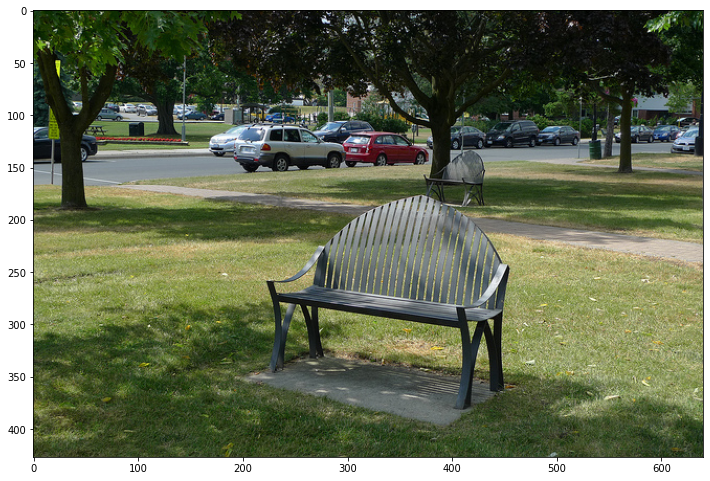

In [7]:
import cv2
import matplotlib.pyplot as plt
img = '/content/mmdetection/demo/demo.jpg'

img_arr  = cv2.imread(img)
img_arr_rgb = cv2.cvtColor(img_arr, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(12, 12))
plt.imshow(img_arr_rgb)

In [8]:
img_path = '/content/mmdetection/demo/demo.jpg'
# inference_detector의 인자로 string(file경로), ndarray가 단일 또는 list형태로 입력 될 수 있음. 
results = inference_detector(model, img_arr)

/usr/local/lib/python3.7/dist-packages/mmdet-2.25.1-py3.7.egg/mmdet/datasets/utils.py:70: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  'data pipeline in your config file.', UserWarning)


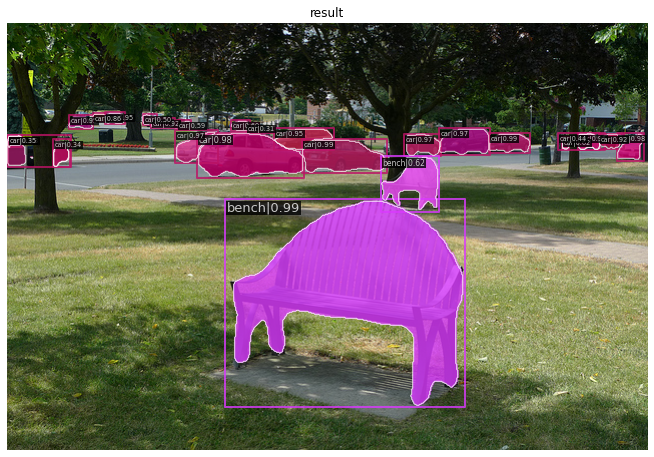

In [9]:
from mmdet.apis import show_result_pyplot
# inference 된 결과를 원본 이미지에 적용하여 새로운 image로 생성(bbox 처리된 image)
# Default로 score threshold가 0.3 이상인 Object들만 시각화 적용. show_result_pyplot은 model.show_result()를 호출. 
show_result_pyplot(model, img_arr, results)

### Inference 결과로 반환되는 results 값 살펴 보기
* inference_detector(model, img_path)의 결과로 반환되는 값은 instance segmentation 일 경우 Object Detection 결과에 추가되어 segmentation masking 정보도 함께 반환됨

In [10]:
type(results), len(results)
# masking 정보도 있기에 특이하게 나온다.(튜플 형태)

(tuple, 2)

In [11]:
results
# bbox 정보
# masking 정보
# mask는 list안의 list로 mask 정보가 들어있다.
# image size만큼 array를 list가 감싸고 있다. -> detect된 갯수만큼 갖고 있다.

([array([[5.3380640e+02, 1.0804523e+02, 5.4053583e+02, 1.2511749e+02,
          9.9973656e-02]], dtype=float32),
  array([], shape=(0, 5), dtype=float32),
  array([[4.81508270e+02, 1.10576378e+02, 5.22668701e+02, 1.30030945e+02,
          9.90980089e-01],
         [2.94944916e+02, 1.16492386e+02, 3.79828735e+02, 1.50493484e+02,
          9.89214838e-01],
         [6.09770691e+02, 1.10475830e+02, 6.36041443e+02, 1.38237396e+02,
          9.83308971e-01],
         [1.84219271e-01, 1.12309654e+02, 6.32011337e+01, 1.44734024e+02,
          9.83204901e-01],
         [1.89931061e+02, 1.10189613e+02, 2.96254059e+02, 1.55370819e+02,
          9.80140746e-01],
         [4.31934601e+02, 1.05915459e+02, 4.82009277e+02, 1.32418304e+02,
          9.71464217e-01],
         [1.67749054e+02, 1.07459709e+02, 2.10424194e+02, 1.40552200e+02,
          9.65439916e-01],
         [3.96333069e+02, 1.11172188e+02, 4.33640717e+02, 1.33290237e+02,
          9.65018332e-01],
         [5.70615112e+02, 1.10114746e

In [12]:
print(type(results[0]), len(results[0]), type(results[1]), len(results[1]) )

<class 'list'> 80 <class 'list'> 80


In [13]:
'''results[0]는 list형으로 coco class의  0부터 79까지 class_id별로 80개의 array를 가짐. 
개별 array들은 각 클래스별로 5개의 값(좌표값과 class별로 confidence)을 가짐. 개별 class별로 여러개의 좌표를 가지면 여러개의 array가 생성됨. 
좌표는 좌상단(xmin, ymin), 우하단(xmax, ymax) 기준. 
개별 array의 shape는 (Detection된 object들의 수, 5(좌표와 confidence)) 임
'''
print(type(results[0][0]), results[0][0].shape, results[0][1].shape, results[0][2].shape)
# 각 class별 detect된 object 갯수이다.
# 각각 1개 0개 45개 존재
# 5 : 좌상단, 우하단, conffidence score

<class 'numpy.ndarray'> (1, 5) (0, 5) (45, 5)


In [14]:
mask_imsi = results[1][0][0]
print(mask_imsi)

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


In [15]:
print(mask_imsi[mask_imsi > 0], mask_imsi[mask_imsi == 0])
# true, false로 찾아보기

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True] [False False False ... False False False]


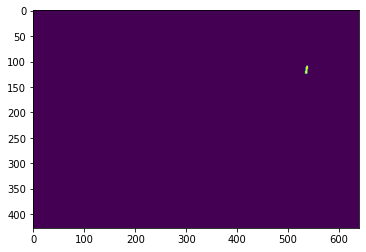

In [16]:
plt.imshow(results[1][0][0])

* 시각화

In [17]:
import numpy as np

def apply_mask(image, mask, color, alpha=0.5):
  for c in range(3):
    # mask값이 1일 경우는 원본 pixel값에 컬러 segmentation을 적용하고 
    # 그렇지 않을 경우 원본 pixel값을 그대로 유지. 
    image[:, :, c] = np.where(mask == 1,
                              image[:, :, c] *
                              (1 - alpha) + alpha * color[c] * 255,
                              image[:, :, c])
  return image

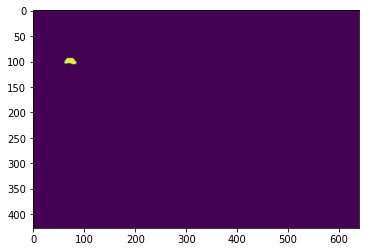

In [18]:
plt.imshow(results[1][2][10])

(-0.5, 639.5, 426.5, -0.5)

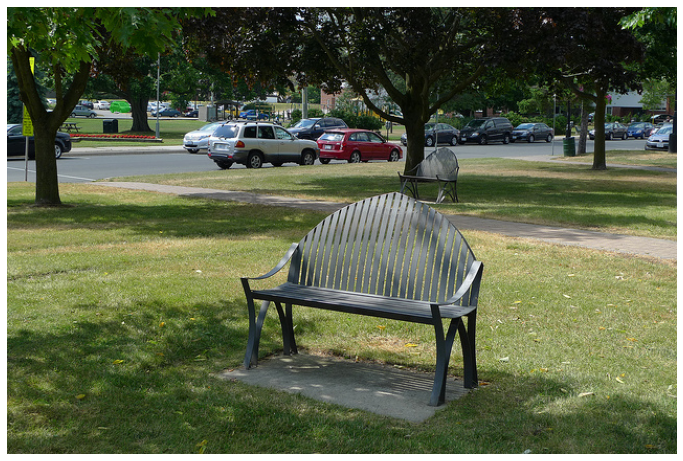

In [20]:
draw_img = cv2.cvtColor(img_arr, cv2.COLOR_BGR2RGB)
masked_image = apply_mask(draw_img, results[1][2][9], (0, 255, 0), alpha=0.6)
plt.figure(figsize=(12, 14))
plt.imshow(masked_image)
plt.axis('off')

In [21]:
results[1] # mask 정보

[[array([[False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         ...,
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False]])],
 [],
 [array([[False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         ...,
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False]]),
  array([[False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         ...,
         [False, False, False, ..., False, False, False],
         [False, Fal

In [22]:
results[0][3]

array([], shape=(0, 5), dtype=float32)

In [23]:
results[1][3] # 없다.

[]

In [24]:
results[1][2]

[array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]]),
 array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]]),
 array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, Fal

(-0.5, 639.5, 426.5, -0.5)

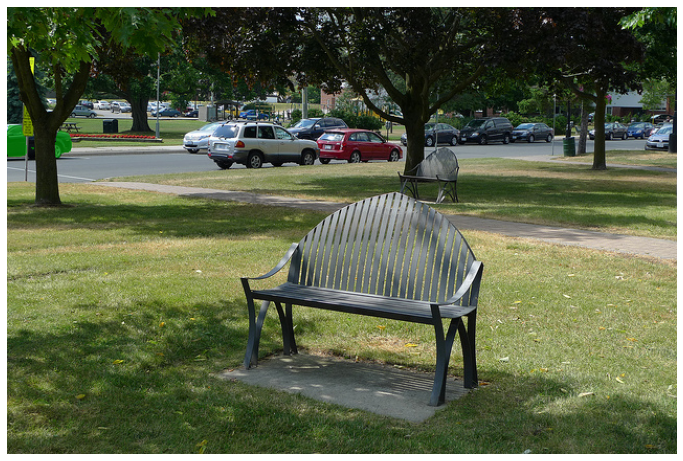

In [25]:
draw_img = cv2.cvtColor(img_arr, cv2.COLOR_BGR2RGB)
masked_image = apply_mask(draw_img, results[1][2][3], (0, 255, 0), alpha=0.6)
plt.figure(figsize=(12, 14))
plt.imshow(masked_image)
plt.axis('off')

(-0.5, 639.5, 426.5, -0.5)

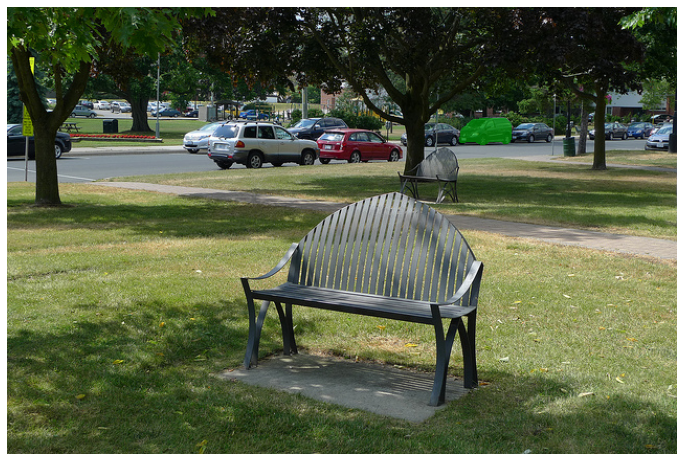

In [26]:
draw_img = cv2.cvtColor(img_arr, cv2.COLOR_BGR2RGB)
masked_image = apply_mask(draw_img, results[1][2][5], (0, 255, 0), alpha=0.6)
plt.figure(figsize=(12, 14))
plt.imshow(masked_image)
plt.axis('off')

In [27]:
# 0부터 순차적으로 클래스 매핑된 label 적용. 
labels_to_names_seq = {0:'person',1:'bicycle',2:'car',3:'motorbike',4:'aeroplane',5:'bus',6:'train',7:'truck',8:'boat',9:'traffic light',10:'fire hydrant',
                        11:'stop sign',12:'parking meter',13:'bench',14:'bird',15:'cat',16:'dog',17:'horse',18:'sheep',19:'cow',20:'elephant',
                        21:'bear',22:'zebra',23:'giraffe',24:'backpack',25:'umbrella',26:'handbag',27:'tie',28:'suitcase',29:'frisbee',30:'skis',
                        31:'snowboard',32:'sports ball',33:'kite',34:'baseball bat',35:'baseball glove',36:'skateboard',37:'surfboard',38:'tennis racket',39:'bottle',40:'wine glass',
                        41:'cup',42:'fork',43:'knife',44:'spoon',45:'bowl',46:'banana',47:'apple',48:'sandwich',49:'orange',50:'broccoli',
                        51:'carrot',52:'hot dog',53:'pizza',54:'donut',55:'cake',56:'chair',57:'sofa',58:'pottedplant',59:'bed',60:'diningtable',
                        61:'toilet',62:'tvmonitor',63:'laptop',64:'mouse',65:'remote',66:'keyboard',67:'cell phone',68:'microwave',69:'oven',70:'toaster',
                        71:'sink',72:'refrigerator',73:'book',74:'clock',75:'vase',76:'scissors',77:'teddy bear',78:'hair drier',79:'toothbrush' }

colors = list(
    [[0, 255, 0],
     [0, 0, 255],
     [255, 0, 0],
     [0, 255, 255],
     [255, 255, 0],
     [255, 0, 255],
     [80, 70, 180],
     [250, 80, 190],
     [245, 145, 50],
     [70, 150, 250]] )
# 칼라지정

In [28]:
#mask threshold값은 mask_thr_binary=0.5 로 지정되어 있음. 
print(model.cfg.pretty_text)

model = dict(
    type='MaskRCNN',
    backbone=dict(
        type='ResNet',
        depth=101,
        num_stages=4,
        out_indices=(0, 1, 2, 3),
        frozen_stages=1,
        norm_cfg=dict(type='BN', requires_grad=True),
        norm_eval=True,
        style='pytorch',
        init_cfg=None),
    neck=dict(
        type='FPN',
        in_channels=[256, 512, 1024, 2048],
        out_channels=256,
        num_outs=5),
    rpn_head=dict(
        type='RPNHead',
        in_channels=256,
        feat_channels=256,
        anchor_generator=dict(
            type='AnchorGenerator',
            scales=[8],
            ratios=[0.5, 1.0, 2.0],
            strides=[4, 8, 16, 32, 64]),
        bbox_coder=dict(
            type='DeltaXYWHBBoxCoder',
            target_means=[0.0, 0.0, 0.0, 0.0],
            target_stds=[1.0, 1.0, 1.0, 1.0]),
        loss_cls=dict(
            type='CrossEntropyLoss', use_sigmoid=True, loss_weight=1.0),
        loss_bbox=dict(type='L1Loss', loss_weight=1.0

In [29]:
# model과 원본 이미지 array, filtering할 기준 class confidence score를 인자로 가지는 inference 시각화용 함수 생성. 
# 이미 inference 시 mask boolean값이 들어오므로 mask_threshold 값을 필요하지 않음. 
def get_detected_img(model, img_array,  score_threshold=0.3, is_print=True):
  
  draw_img = img_array.copy()
  # 인자로 들어온 image_array를 복사.
  bbox_color=(0, 255, 0)
  text_color=(0, 0, 255)
  # 칼라지정

  
  results = inference_detector(model, img_array)
  # model과 image array를 입력 인자로 inference detection 수행하고 결과를 results로 받음. 
  bbox_results = results[0]
  # box 정보 
  seg_results = results[1]
  # seg 정보
  

  for result_ind, bbox_result in enumerate(bbox_results):
  # id와 bbox 좌표 각각 입력 받기
    
    if len(bbox_result) == 0:
    # 개별 2차원 array의 row size가 0 이면 해당 Class id로 값이 없으므로 다음 loop로 진행. 
      continue
    
    mask_array_list = seg_results[result_ind]
    # id에 해당하는 mask 정보
    
    for i in range(len(bbox_result)):
      # 좌상단, 우하단 좌표 추출
      if bbox_result[i, 4] > score_threshold:
        # threshold 기준
        left = int(bbox_result[i, 0]) # 좌상단
        top = int(bbox_result[i, 1])
        right = int(bbox_result[i, 2]) # 우하단
        bottom = int(bbox_result[i, 3])

        caption = "{}: {:.4f}".format(labels_to_names_seq[result_ind], bbox_result[i, 4])
        # 이름정보하고 confidence score를 caption에 저장
        cv2.rectangle(draw_img, (left, top), (right, bottom), color=bbox_color, thickness=2)
        # bbox 그리기
        cv2.putText(draw_img, caption, (int(left), int(top - 7)), cv2.FONT_HERSHEY_SIMPLEX, 0.37, text_color, 1)
        # 이름 그리기                                 

        class_mask_array = mask_array_list[i]
        # 해당 마스크 정보

        masked_roi = draw_img[class_mask_array]
        # 원본 image array에서 mask가 True인 영역만 별도 추출.
         
        color_index = np.random.randint(0, len(colors)-1)
        #color를 임의 지정
        
        color = colors[color_index]
        #color_index = result_ind % len(colors)

        
        draw_img[class_mask_array] = ([0.3*color[0], 0.3*color[1], 0.3*color[2]] + 0.6 * masked_roi).astype(np.uint8)
        # 원본 이미지의 masking 될 영역에 mask를 특정 투명 컬러로 적용
        if is_print:
          print(caption)

  return draw_img

In [30]:
img_arr = cv2.imread('/content/mmdetection/demo/demo.jpg')
mask_array = results[1][2][0]
# 위의 자동차 mask 정보
print('image array shape:', img_arr.shape)
print('mask array shape:', mask_array.shape)
print('mask true array shape:', mask_array[mask_array].shape)
# true인 갯수
print('masked array shape:', img_arr[results[1][2][0]].shape)

image array shape: (427, 640, 3)
mask array shape: (427, 640)
mask true array shape: (628,)
masked array shape: (628, 3)


car: 0.9910
car: 0.9892
car: 0.9833
car: 0.9832
car: 0.9801
car: 0.9715
car: 0.9654
car: 0.9650
car: 0.9546
car: 0.9531
car: 0.9524
car: 0.9464
car: 0.9209
car: 0.9160
bench: 0.9872


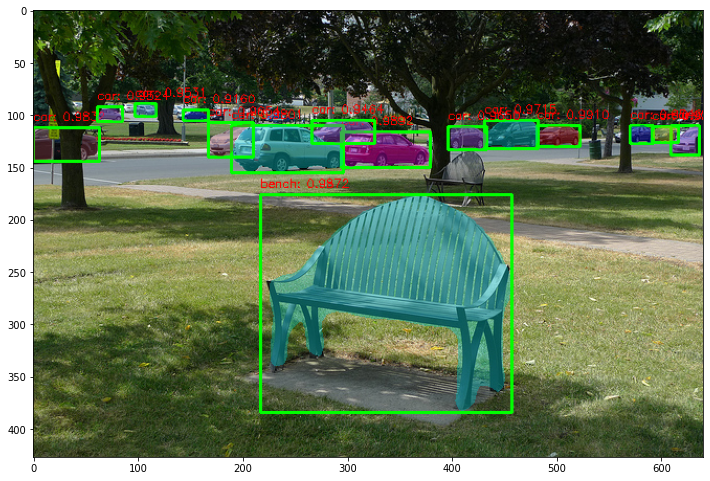

In [32]:
import matplotlib.pyplot as plt

img_arr = cv2.imread('/content/mmdetection/demo/demo.jpg')
detected_img = get_detected_img(model, img_arr,  score_threshold=0.9, is_print=True)
# detect 입력된 이미지는 bgr임. 이를 최종 출력시 rgb로 변환 
detected_img = cv2.cvtColor(detected_img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12, 12))
plt.imshow(detected_img)

person: 0.9995
person: 0.9993
person: 0.9993
person: 0.9993
person: 0.9992
person: 0.9986
person: 0.9986
tie: 0.9888
sports ball: 0.3628


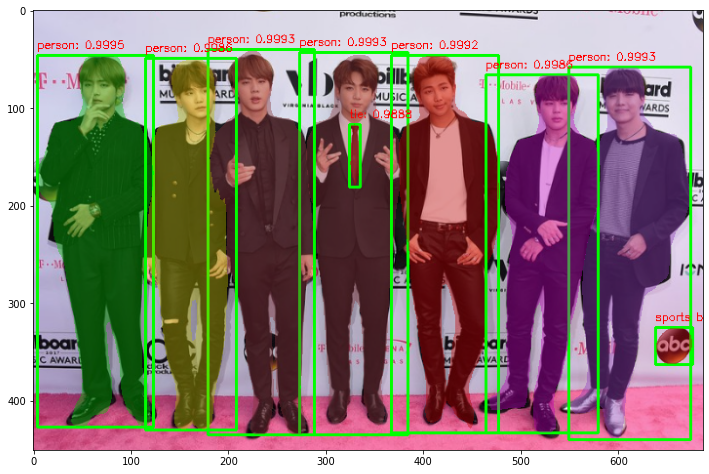

In [33]:
import matplotlib.pyplot as plt

img_arr = cv2.imread('/content/drive/MyDrive/CDS2(2022-2)/img/test/bts.png')
detected_img = get_detected_img(model, img_arr,  score_threshold=0.3, is_print=True)
# detect 입력된 이미지는 bgr임. 이를 최종 출력시 rgb로 변환 
detected_img = cv2.cvtColor(detected_img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12, 12))
plt.imshow(detected_img)